# Hello Quantum Computing World on a 2 qubits circuit

## Step1: Map the problem to circuits and operators

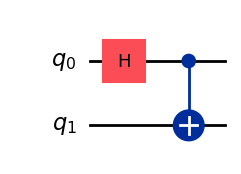

In [1]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)

qc.draw(output='mpl')

In [4]:
from qiskit.quantum_info import Pauli

ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

observables = [ZZ, ZI, IZ, XX, XI, IX]

ZZ = Pauli('ZZ')：表示两个量子比特上的 (Z \otimes Z) 运算符。
ZI = Pauli('ZI')：表示第一个量子比特上的 (Z) 运算符和第二个量子比特上的单位运算符 (I)。
IZ = Pauli('IZ')：表示第一个量子比特上的单位运算符 (I) 和第二个量子比特上的 (Z) 运算符。
...
你可以尝试使用 Qiskit 的 `Pauli` 类来定义 Pauli 运算符。以下是一个简单的示例：

X = Pauli('X')  
Y = Pauli('Y')  
Z = Pauli('Z')  
I = Pauli('I')  

X, Y, Z, I 是 Pauli 运算符

$$
  
I = \begin{pmatrix}  
1 & 0 \\  
0 & 1  
\end{pmatrix}  

X = \begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix} 

Y = \begin{pmatrix}
0 & -i \\
i & 0
\end{pmatrix}


Z = \begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
 
$$


## Step2: Optimize

## Step3: Execute

In [5]:
from qiskit_aer.primitives import Estimator

estimator = Estimator()

job = estimator.run([qc] * len(observables), observables)

job.result()

EstimatorResult(values=array([ 1.        , -0.01171875, -0.01171875,  1.        ,  0.00585938,
        0.00585938]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0031512, 'sample_measure_time': 0.0005823, 'input_qubit_map': [[0, 0], [1, 1]], 'max_memory_mb': 16110, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 20, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.9998626708984375, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0031512, 'sample_measure_time': 0.0005

## Step4: Post-processing and Plotting

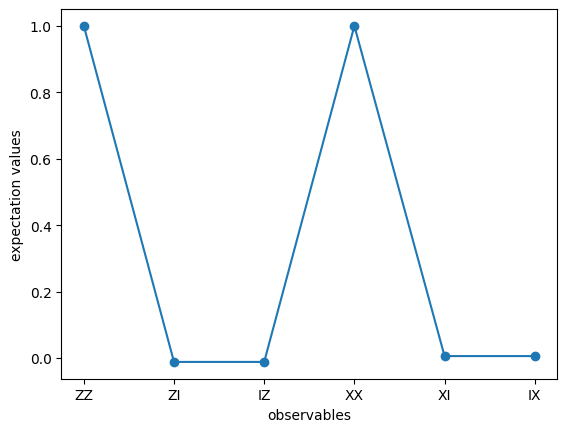

In [7]:
import matplotlib.pyplot as plt

data = ['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX']
values = job.result().values

plt.plot(data, values, '-o')
plt.xlabel('observables')
plt.ylabel('expectation values')
plt.show()

# Extend 2-qubit hello-world to n-qubit

## Map problem to circuit

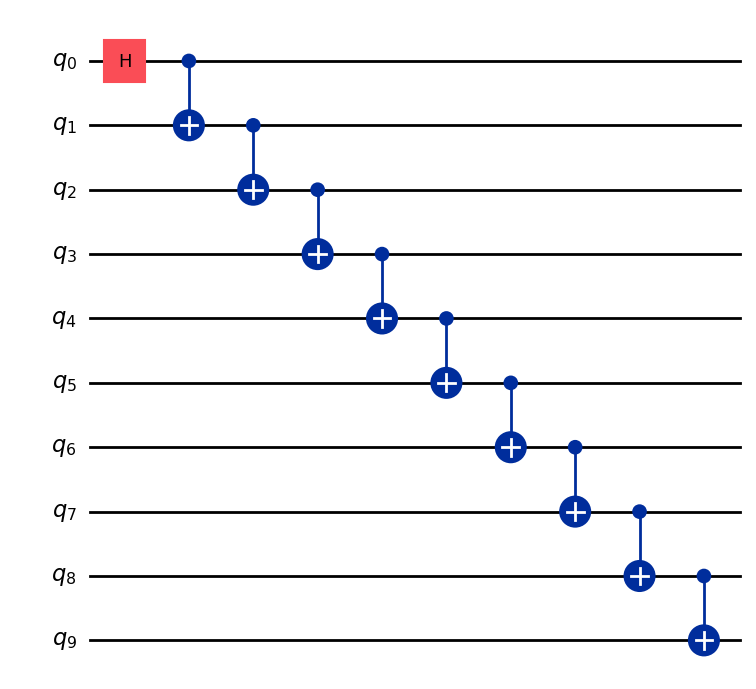

In [10]:
def n_qubit_GHZ_state(n):
    qc = QuantumCircuit(n)
    qc.h(0)
    for i in range(n-1):
        qc.cx(i, i+1)
    return qc

n = 10
qc = n_qubit_GHZ_state(n)
qc.draw(output='mpl')

In [12]:
from qiskit.quantum_info import SparsePauliOp

operator_strings = ['Z'+ 'I'*i + 'Z' + 'I'*(n-i-2) for i in range(n-1) ]
print(operator_strings)
print(len(operator_strings))

operators = [SparsePauliOp(s) for s in operator_strings]

['ZZIIIIIIII', 'ZIZIIIIIII', 'ZIIZIIIIII', 'ZIIIZIIIII', 'ZIIIIZIIII', 'ZIIIIIZIII', 'ZIIIIIIZII', 'ZIIIIIIIZI', 'ZIIIIIIIIZ']
9


## Optimize the problem

In [17]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

backendname = 'ibm_osaka'
backend = QiskitRuntimeService().get_backend(backendname)
pass_manager = generate_preset_pass_manager(optimization_level=1, backend=backend)
qc_transpiled = pass_manager.run(qc)
operators_transplied_list = [op.apply(qc_transpiled) for op in operators]

RequestsApiError: '403 Client Error: Forbidden for url: https://auth.quantum-computing.ibm.com/api/users/loginWithToken. Your IBM Quantum account has been disabled. Learn more: https://ibm.biz/BdfaME., Error code: 3485.'